# Time series analysis on Istanbul mean temperature data set

First,read istanbul_temp.txt file into a csv file

In [1]:
# import pandas library as pd
import pandas as pd

In [2]:
#read data into a data frame
data=pd.read_csv("istanbul_temp.txt",skiprows=22,header=None,names=["STAID","SOUID","DATE","TG","Q_TG"])

check  bottom of the dataframe to see what is happening

In [3]:
data.tail()

,STAID,SOUID,DATE,TG,Q_TG
32410,248,101231,20170926,-9999,9
32411,248,101231,20170927,-9999,9
32412,248,101231,20170928,-9999,9
32413,248,101231,20170929,-9999,9
32414,248,101231,20170930,-9999,9


check top of the dataframe

In [14]:
data.head()

,STAID,SOUID,DATE,TG,Q_TG
0,248,101231,19290101,126,0
1,248,101231,19290102,133,0
2,248,101231,19290103,131,0
3,248,101231,19290104,118,0
4,248,101231,19290105,106,0


In [18]:
data[data.Q_TG != 9]

,STAID,SOUID,DATE,TG,Q_TG
0,248,101231,19290101,126,0
1,248,101231,19290102,133,0
2,248,101231,19290103,131,0
3,248,101231,19290104,118,0
4,248,101231,19290105,106,0
...,...,...,...,...,...
27419,248,101231,20040127,36,0
27420,248,101231,20040128,85,0
27421,248,101231,20040129,128,0
27422,248,101231,20040130,78,0


Note that in the file it is written as “9” in Q_RR columns shows the missing data.
30-34 Q_RR : Quality code for RR (0='valid'; 1='suspect'; 9='missing')
<br>Drop the rows that have 9’s in the Q_RR column.
<br>data=data[data["Q_TG"]!=9] Generates a new dataframe where rows that have “9” omitted.


In [19]:
data=data[data.Q_TG != 9]

In [ ]:
#now check the bottom of the file

In [20]:
data.tail()

,STAID,SOUID,DATE,TG,Q_TG
27419,248,101231,20040127,36,0
27420,248,101231,20040128,85,0
27421,248,101231,20040129,128,0
27422,248,101231,20040130,78,0
27423,248,101231,20040131,46,0


To make sure check unique elements on Q_TG column

In [21]:
data.Q_TG.unique()

array([0, 1])

In [22]:
# 
data.Q_TG.value_counts()

0    27416
1        8
Name: Q_TG, dtype: int64

In [23]:
len(data)

27424

You should only see values 0 and 1

In [26]:
data.head()

,STAID,SOUID,DATE,TG,Q_TG
0,248,101231,19290101,12.6,0
1,248,101231,19290102,13.3,0
2,248,101231,19290103,13.1,0
3,248,101231,19290104,11.8,0
4,248,101231,19290105,10.6,0


In [25]:
data.TG=data.TG*0.1

/Users/sefer_imac/opt/anaconda3/envs/env_python38/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27424 entries, 0 to 27423
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STAID   27424 non-null  int64  
 1   SOUID   27424 non-null  int64  
 2   DATE    27424 non-null  int64  
 3   TG      27424 non-null  float64
 4   Q_TG    27424 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.3 MB


DATE column now is in string format we should change it into a datetime object format
<br> use pd.to_datetime() function

In [76]:
datetime(2012,1,1)

datetime.datetime(2012, 1, 1, 0, 0)

In [28]:
data.DATE=pd.to_datetime(data.DATE,format="%Y%m%d")

/Users/sefer_imac/opt/anaconda3/envs/env_python38/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


check the top of DATE column

you see that data type is changed to datetime64

set the index of the dataframe as the DATE column
<br> for this use dataframe.set_index() function

In [30]:
data.set_index("DATE",inplace=True)

again check the top of dataframe

In [31]:
data.head()

,STAID,SOUID,TG,Q_TG
DATE,,,,
1929-01-01,248,101231,12.6,0
1929-01-02,248,101231,13.3,0
1929-01-03,248,101231,13.1,0
1929-01-04,248,101231,11.8,0
1929-01-05,248,101231,10.6,0


## Resampling examples 

we have daily mean temperatures, calculate the yearly average temperatures
<br> use dataframe.resample() function for this create a new dataframe "data_yearly"

In [43]:
data_yearly=data.resample("AS").TG.mean()

check top of data_yearly dataframe to see how it looks like

In [44]:
data_yearly.head()

DATE
1929-01-01    13.904110
1930-01-01    14.788493
1931-01-01    14.329041
1932-01-01    15.054372
1933-01-01    13.490685
Freq: AS-JAN, Name: TG, dtype: float64

now plot these yearly avearges

<AxesSubplot:xlabel='DATE'>

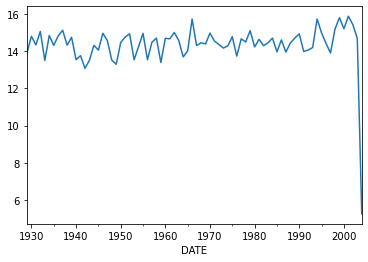

In [45]:
data_yearly.plot()

Note that something looks weird around 2000, we have a sudden drop!
<br> check the bottom of data_yearly dataframe

In [46]:
data_yearly.tail()

DATE
2000-01-01    15.195902
2001-01-01    15.867397
2002-01-01    15.420822
2003-01-01    14.674795
2004-01-01     5.254839
Freq: AS-JAN, Name: TG, dtype: float64

at the year 2004, tempearature is very small compared to other years
<br> to investigate this, find how many datapoints we have in "data" dataframe
<br> you can use size function to create a series called "yearly_size"

In [51]:
yearly_size=data.resample("AS").size()

check the bottom of this series

In [52]:
yearly_size.tail()

DATE
2000-01-01    366
2001-01-01    365
2002-01-01    365
2003-01-01    365
2004-01-01     31
Freq: AS-JAN, dtype: int64

we got the answer!!
<br> the year 2004 has only 31 datapoints, probably data from january that is why the aveage temperature is so low

let's check for which years the number of days is not 365
<br> type yearly_size!=365, what sort of output do we have?

In [53]:
yearly_size!=365

DATE
1929-01-01    False
1930-01-01    False
1931-01-01    False
1932-01-01     True
1933-01-01    False
              ...  
2000-01-01     True
2001-01-01    False
2002-01-01    False
2003-01-01    False
2004-01-01     True
Freq: AS-JAN, Length: 76, dtype: bool

We got a boolen series, if we insert this series into yearly_size series, 
we will get rows that are true

In [54]:
yearly_size[yearly_size!=365]

DATE
1932-01-01    366
1936-01-01    366
1940-01-01    366
1944-01-01    366
1948-01-01    366
1952-01-01    366
1956-01-01    366
1960-01-01    366
1964-01-01    366
1968-01-01    366
1972-01-01    366
1976-01-01    366
1980-01-01    366
1984-01-01    366
1988-01-01    366
1992-01-01    366
1996-01-01    366
2000-01-01    366
2004-01-01     31
dtype: int64

All the rows except of the last one has 366
<br> so this years are leap years

Accesing data for certain years
<br> let's get the yearly_size information only for the years between 1950 and 1960

try first yearly_size[1950:1960], see what happens

In [55]:
yearly_size

DATE
1929-01-01    365
1930-01-01    365
1931-01-01    365
1932-01-01    366
1933-01-01    365
             ... 
2000-01-01    366
2001-01-01    365
2002-01-01    365
2003-01-01    365
2004-01-01     31
Freq: AS-JAN, Length: 76, dtype: int64

In [56]:
yearly_size[1950:1960]

Series([], Freq: AS-JAN, dtype: int64)

we didn't get anything because our index is a datetime index and we should enquiry with the same data structure

we write the date either in string format :
<br> yearly_size["1/1/1950":"1/1/1960"]

In [60]:
yearly_size["1;1-1950":"1/1/1960"]

DATE
1950-01-01    365
1951-01-01    365
1952-01-01    366
1953-01-01    365
1954-01-01    365
1955-01-01    365
1956-01-01    366
1957-01-01    365
1958-01-01    365
1959-01-01    365
1960-01-01    366
Freq: AS-JAN, dtype: int64

or, we can create a datetime object for this
<br> first, import datetime object and create timestamps for 1950 and 1960

In [61]:
from datetime import datetime

In [62]:
t1=datetime(1950,1,1)

In [63]:
t1

datetime.datetime(1950, 1, 1, 0, 0)

In [67]:
t1.year

1950

In [68]:
t1.month

1

In [ ]:
type(t1)

we can put these datetime objects as indeces for time series

In [64]:
yearly_size[datetime(1950,1,1):datetime(1960,1,1)]

DATE
1950-01-01    365
1951-01-01    365
1952-01-01    366
1953-01-01    365
1954-01-01    365
1955-01-01    365
1956-01-01    366
1957-01-01    365
1958-01-01    365
1959-01-01    365
1960-01-01    366
Freq: AS-JAN, dtype: int64

## Plot average temperatures in March over the years 

First, get montly averages
<br> create a time series for monthy averages, name this series montly

In [65]:
monthly=data.resample("MS").TG.mean()

check the top of this series

In [66]:
monthly.head()

DATE
1929-01-01     5.454839
1929-02-01     1.957143
1929-03-01     3.445161
1929-04-01     9.976667
1929-05-01    18.883871
Freq: MS, Name: TG, dtype: float64

We got the averages for each monthy
<br> but we are interested in only march months

Since our index is a datetime object, one good feature of this object is that we can get such information like month,day,hour etc
<br>try: monthly.index.month

In [71]:
monthly.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             4,  5,  6,  7,  8,  9, 10, 11, 12,  1],
           dtype='int64', name='DATE', length=901)

here 1 is for jan, 2 is for feb and so on 
<br> if we select rows whose monthly.index.month is equal to 3, then we select march months

In [72]:
monthly.index.month==3

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

if you put this boolean array into monthly time series as a index, you will get data for only march months
<br> we create a new series for marches

In [73]:
monthy_march=monthly[monthly.index.month==3]

see the top lines of this monthy_march series

In [74]:
monthy_march.head()

DATE
1929-03-01    3.445161
1930-03-01    9.393548
1931-03-01    7.825806
1932-03-01    6.216129
1933-03-01    6.719355
Name: TG, dtype: float64

Let's plot this average temperatures

<AxesSubplot:xlabel='DATE'>

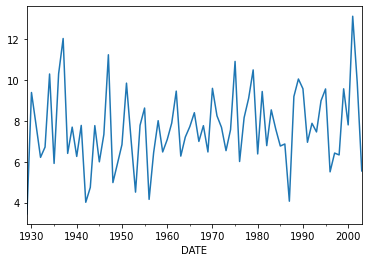

In [75]:
monthy_march.plot()